In [1]:
#Import Dependencies
#pandas dataframes and statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#curve fitting
from scipy.stats import linregress
#CSV usage
import os
import csv
import pathlib

In [2]:
#US Region Breakdown
north = ['CT','ME','MA','MO','NE','NH','NJ','NY','PA','RI','VT']
west = ['AZ','CO','CA','ID','MT','NM','NV','OR','UT','WA','WY']
mid = ['IL','IN','IA','KS','MI','MN','ND','OH','SD','WI']
south = ['AL','AR','DE','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV']

#list of months for index
months_list = [202111,  202110,  202109,  202108,  202107,  202106,  202105,  202104,  202103,  202102,  202101,  202012,  202011,  202010,  202009,  202008,  202007,  202006,  202005,  202004,  202003,  202002,  202001,  201912,  201911,  201910,  201909,  201908,  201907,  201906,  201905,  201904,  201903,  201902,  201901,  201812,  201811,  201810,  201809,  201808,  201807,  201806,  201805,  201804,  201803,  201802,  201801,  201712,  201711,  201710,  201709,  201708,  201707,  201706,  201705,  201704,  201703,  201702,  201701,  201612,  201611,  201610,  201609,  201608,  201607,  201606,  201605,  201604,  201603,  201602,  201601,  201512,  201511,  201510,  201509,  201508,  201507,  201506,  201505,  201504,  201503,  201502,  201501,  201412,  201411,  201410,  201409,  201408,  201407,  201406,  201405,  201404,  201403,  201402,  201401,  201312,  201311,  201310,  201309,  201308,  201307,  201306,  201305,  201304,  201303,  201302,  201301,  201212,  201211,  201210,  201209,  201208,  201207,  201206,  201205,  201204,  201203,  201202,  201201,  201112,  201111,  201110,  201109,  201108,  201107,  201106,  201105,  201104,  201103,  201102,  201101,  201012,  201011,  201010,  201009,  201008,  201007,  201006,  201005,  201004,  201003,  201002,  201001,  200912,  200911,  200910,  200909,  200908,  200907,  200906,  200905,  200904,  200903,  200902,  200901,  200812,  200811,  200810,  200809,  200808,  200807,  200806,  200805,  200804,  200803,  200802,  200801]
months_list.reverse()
months = pd.Series(months_list)

In [3]:
#Load Region Data from CSVs into dataframe and sum regions into single dataframe
#North
northCoal_df = pd.read_csv('project_1/Production Cost Output/north_coal_df.csv') 
northGas_df = pd.read_csv('project_1/Production Cost Output/north_gas_df.csv') 
northPet_df = pd.read_csv('project_1/Production Cost Output/north_petroleum_df.csv')
north_df = northCoal_df + northGas_df + northPet_df

#South
southCoal_df = pd.read_csv('project_1/Production Cost Output/south_coal_df.csv') 
southGas_df = pd.read_csv('project_1/Production Cost Output/south_gas_df.csv') 
southPet_df = pd.read_csv('project_1/Production Cost Output/south_petroleum_df.csv')
south_df = southCoal_df + southGas_df + southPet_df

#Mid-West
midCoal_df = pd.read_csv('project_1/Production Cost Output/mid_coal_df.csv') 
midGas_df = pd.read_csv('project_1/Production Cost Output/mid_gas_df.csv') 
midPet_df = pd.read_csv('project_1/Production Cost Output/mid_petroleum_df.csv') 
mid_df = midCoal_df + midGas_df + midPet_df

#West
westCoal_df = pd.read_csv('project_1/Production Cost Output/west_coal_df.csv') 
westGas_df = pd.read_csv('project_1/Production Cost Output/west_gas_df.csv') 
westPet_df = pd.read_csv('project_1/Production Cost Output/west_petroleum_df.csv') 
west_df = westCoal_df + westGas_df + westPet_df

In [4]:
#compile regions into single dataframe to get average of monthly data for regions
total_columns = ['North','South','Mid-West', 'West']
summed_regions = [north_df.mean(axis=1).values,south_df.mean(axis=1).values,mid_df.mean(axis=1).values,west_df.mean(axis=1).values]

total_df = pd.DataFrame(summed_regions).T
total_df.columns = total_columns
total_df.index = months

#Display Dataframe
total_df

,North,South,Mid-West,West
200801,0.000000,0.000000,0.000,0.000000
200802,0.000000,0.000000,0.000,0.000000
200803,0.000000,0.000000,0.000,0.000000
200804,0.000000,0.000000,0.000,0.000000
200805,0.000000,0.000000,0.000,0.000000
...,...,...,...,...
202107,13.052727,24.896250,45.970,11.351818
202108,20.980000,37.970000,31.794,23.744545
202109,11.257273,41.539375,43.448,21.981818
202110,12.452727,58.520000,54.992,15.006364


In [13]:
#Remove zero rows to allow percentage trends
#find all zeroes
zeroes_df = total_df[total_df.eq(0).all(1)]

#remove all zeroes
total_df = total_df.loc[(total_df!=0).any(axis=1)]
months = total_df.index
len(months)

130

The monthly rate of increase of Production Costs for Region North : 14.28%


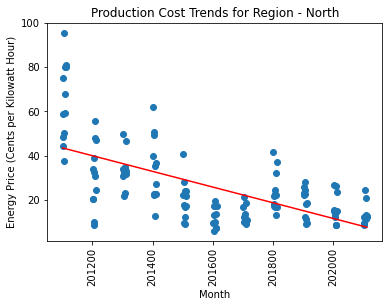

In [14]:
#Create trend lines
#North
prod_North = total_df['North']
plt.scatter(months,prod_North)

# Create equation of line
(slope, intercept, rvalue, pvalue, stderr) = linregress(months,prod_North)
regress_values_North = months * slope + intercept

#Find percentage increase (slope uses month as an integer)
rate = prod_North.pct_change().mean() * 100

#Plot the graph
plt.plot(months,regress_values_North,"r-")
plt.title('Production Cost Trends for Region - North')
plt.xlabel('Month')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
print(f"The monthly rate of increase of Production Costs for Region North : {round(rate,2)}%")
plt.show()

The monthly rate of increase of Production Costs for Region South : -3.89%


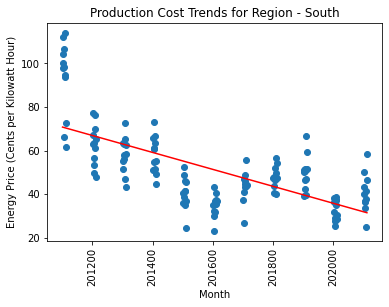

In [15]:
#Create trend lines
#South
prod_South = total_df['South']
plt.scatter(months,prod_South)

# Create equation of line
(slope, intercept, rvalue, pvalue, stderr) = linregress(months,prod_South)
regress_values_South = months * slope + intercept

#Plot the graph
plt.plot(months,regress_values_South,"r-")
plt.title('Production Cost Trends for Region - South')
plt.xlabel('Month')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
print(f"The monthly rate of increase of Production Costs for Region South : {round(slope*100,2)}%")
plt.show()

The monthly rate of increase of Production Costs for Region Mid-West : -1.64%


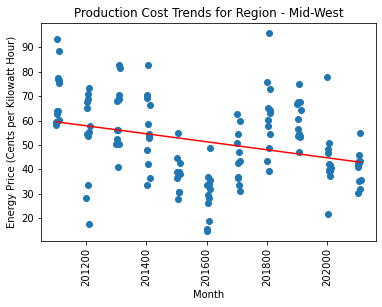

In [16]:
#Create trend lines
#Mid
prod_Mid = total_df['Mid-West']
plt.scatter(months,prod_Mid)

# Create equation of line
(slope, intercept, rvalue, pvalue, stderr) = linregress(months,prod_Mid)
regress_values_Mid = months * slope + intercept

#Plot the graph
plt.plot(months,regress_values_Mid,"r-")
plt.title('Production Cost Trends for Region - Mid-West')
plt.xlabel('Month')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
print(f"The monthly rate of increase of Production Costs for Region Mid-West : {round(slope*100,2)}%")
plt.show()

The monthly rate of increase of Production Costs for Region West : -0.74%


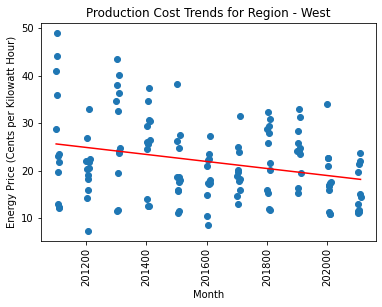

In [17]:
#Create trend lines
#West
prod_West = total_df['West']
plt.scatter(months,prod_West)

# Create equation of line
(slope, intercept, rvalue, pvalue, stderr) = linregress(months,prod_West)
regress_values_West = months * slope + intercept

#Plot the graph
plt.plot(months,regress_values_West,"r-")
plt.title('Production Cost Trends for Region - West')
plt.xlabel('Month')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
print(f"The monthly rate of increase of Production Costs for Region West : {round(slope*100,2)}%")
plt.show()

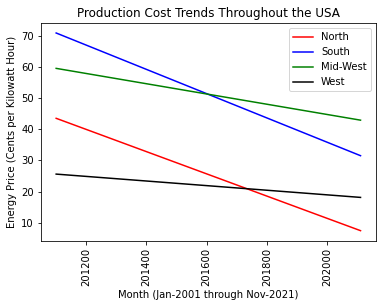

In [18]:
#Plot all the trend lines for comparison
plt.plot(months,regress_values_North, "r-", label='North')
plt.plot(months,regress_values_South, "b-", label='South')
plt.plot(months,regress_values_Mid, "g-", label='Mid-West')
plt.plot(months,regress_values_West, "k-", label='West')
plt.title('Production Cost Trends Throughout the USA')
plt.xlabel('Month (Jan-2001 through Nov-2021)')
plt.ylabel('Energy Price (Cents per Kilowatt Hour)')
plt.xticks(rotation=90)
plt.legend()
plt.show()